## Projet prédiction du churn

## Etape1: Import des packages et des données

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve,recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
!pip install imbalanced-learn

In [2]:
df = pd.read_csv("https://assets-datascientest.s3-eu-west-1.amazonaws.com/de/total/churn.csv", index_col=0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


## Etape2: Exploration et nettoyage des données

In [3]:
# Suppression de l'index
df = df.reset_index()
df = df.drop(['customerID'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
df.shape

(5986, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


AxesSubplot(0.125,0.125;0.698618x0.755)


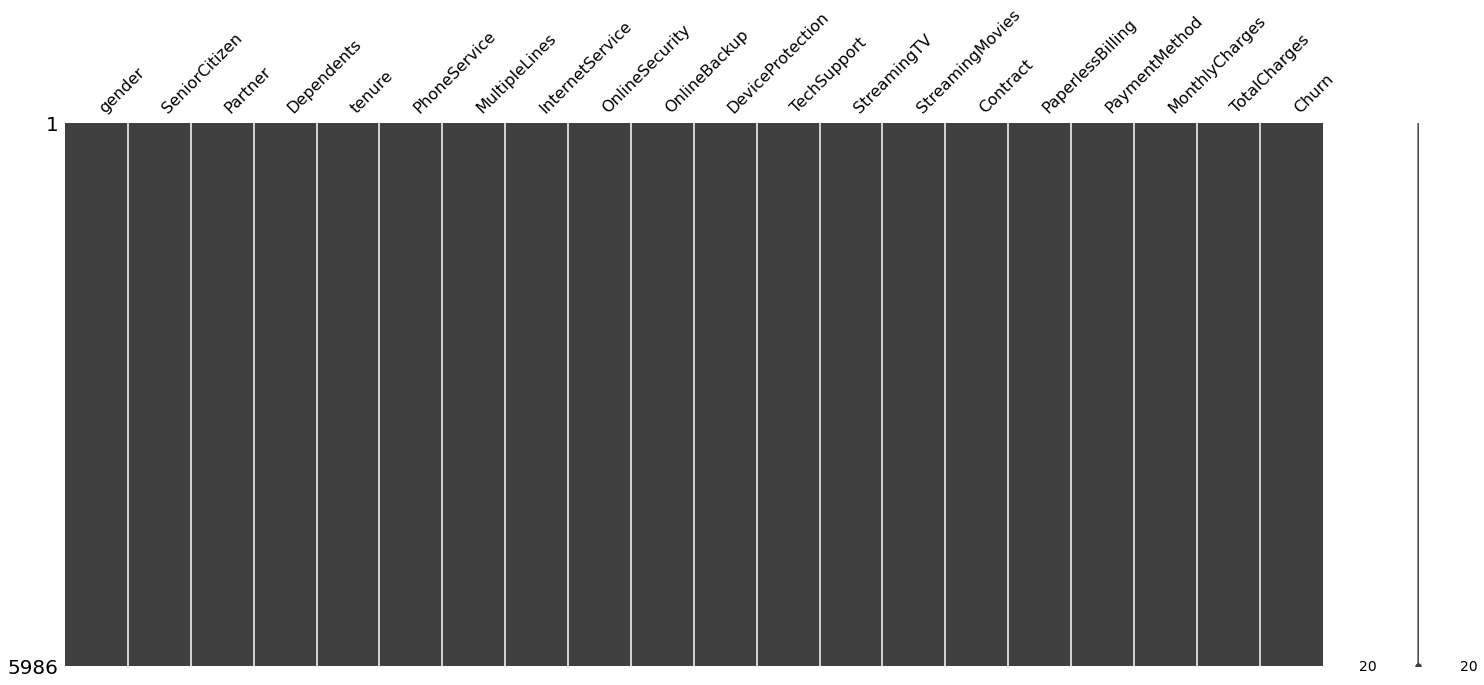

In [6]:
# Recherche des valeurs manquantes dans le dataframe
print(msno.matrix(df))

In [7]:
# Identification des valeurs manquantes:
df = df.replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype('float64')
# Affichage de valeurs manquantes
df.isnull().sum(axis = 0)
# Conclusion: il n'y a 10 valeurs manquantes dans le dataframe au niveau de la colonne 'TotalCharges'

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [8]:
# On remplace les valeurs nulles par 0 pour la variable TotalCharges, ces données correspondent aux factures totales de nouveaux clients.
df.TotalCharges = df.TotalCharges.fillna(0)

In [9]:
# Vérification 
df.isnull().sum(axis = 0)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Etape3 : Visualisation des données

In [10]:
# Distributsion du churn par rapport au genre
#sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")
fig = px.histogram(df, x="Churn", color="gender",barmode="group",barnorm='percent',title="<b>Distributsion du churn par rapport au genre</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()
# Conclusion: En propotion, le genre n'est pas un facteur déterminant du choix de désabonnement ( faire un test stat pour 2 variables catégorièles) nb: penser à normaliser les données en % avant graph

In [11]:
# Distributsion du churn et du genre
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Création de subplots: utilisant le type 'domain' avec le Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# création de donut pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="<b>Distribution de Churn et Genre</b>",
    # Ajout des labels au centre du donut.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

# 26.5 % de client changent d'opérateur alors que 73.5 % restent avec leur opérateur
# Les cleint sont à 49 % des femmes et à 51% des hommes

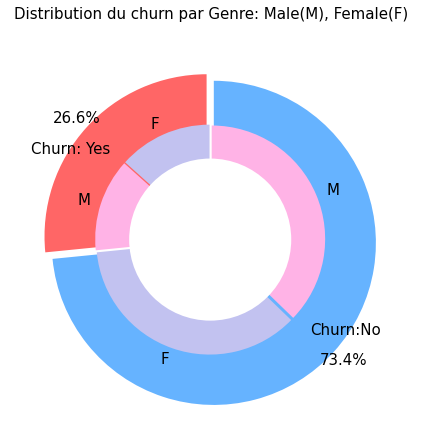

In [12]:
# Répartition du churn par genre
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
# Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
# cercle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distribution du churn par Genre: Male(M), Female(F)", fontsize=15, y=1.1)

# affichage 
plt.axis('equal')
plt.tight_layout()
plt.show()

# on observe une répartition équivalente de churn chez les deux populations Hommes et femmes. 
# Le genre n'a pas d'influence sur la variable cible churn

In [13]:
# Distribution du churn par type de contrat client
fig = px.histogram(df, x="Churn", color="Contract", barmode="group",barnorm='percent', title="<b>Distribution du churn par type de contrat client<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

# En propostion, les contrats au mois par mois sont ceux qui sont les plus susceptibles d'être résiliés.

In [14]:
# Distribution des modes de payement:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Distribution des modes de payement</b>")
fig.show()

In [15]:
# Distribution des modes de payement couplés au churn

color_map = {"Credit card (automatic)	": "#FF97FF",
             "Bank transfer (automatic)": "#AB63FA",
             "Electronic check	":"#00ffaf",
             "Mailed check":"#63F5EF"}
fig = px.histogram(df, x="Churn", color="PaymentMethod",barnorm ='percent', title="<b>Distribution des modes de payement couplés au churn</b>",color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

# En normalisant les données en pourcentage, on s'aperçoit que la méthode de payement électronique est celle qui est la plus suceptible de générer le churn.

In [16]:
# Distribution du churn par rapport au service internet
color_map = {"DSL	": "#DFD5CC",
             "Fiber optic": "#6f6a66",
             "No Internet":"#00ffaf"}
fig = px.histogram(df, x="Churn", color="InternetService",barnorm ='percent',barmode="group", title="<b>Distribution du churn par rapport au type de service internet</b>",color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()
# En normalisant les données en pourcentage, la fibre optique est le type de service internet qui génère le plus de churn.

In [17]:
# Distribution de churn par rapport aux client disposants de multiples line téléphonique
color_map = {"Yes": "#c6e2ff",
             "No": "#66b2b2",
             "No phone service":"#0000ff"}
fig = px.histogram(df, x="Churn", color="MultipleLines", barmode="group", barnorm ='percent',title="<b>Distribution du churn pour les clients avec de multiples lignes<b>",color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

# En propostion, le fait dedisposer de multiples lignes ou non n'a pas d'influence sur le churn

In [18]:
# Distribution de churn par rapport aux backup en ligne
color_map = {"Yes": "#dda0dd",
             "No": "#ff6600",
             "No internet service":"#4c1e00"}
fig = px.histogram(df, x="Churn", color="OnlineBackup",barnorm ='percent', barmode="group",title="<b>Distribution du churn en fonction du backup en ligne<b>",color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

# En proportion, les clients qui n'ont pas eu de backup en ligne sont les plus nombreux à changer d'opérateur

In [19]:
# Distribution de churn par rapport à la protection de l'appareil
color_map = {"Yes": "#66b2b2",
             "No": "#c1e0e0",
             "No internet service":"#142323"}
fig = px.histogram(df, x="Churn", color="DeviceProtection",barnorm ='percent', barmode="group",title="<b>Distribution du churn en fonction du DeviceProtection<b>",color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

# En proportion, les clients qui n'ont pas de la protection de leur appareil sont les plus nombreux à se désabonner

In [20]:
# Distribution de churn par rapport à la disponibilité de la télévision en streaming
color_map = {"Yes": "#00007f",
             "No": "#ccccff",
             "No internet service":"#0000ff"}
fig = px.histogram(df, x="Churn", color="StreamingTV",barnorm ='percent',title="<b>Distribution du churn en fonction de StreamingTV<b>",color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

# En proportion, les clients qui n'ont pas de télévision en streaming sont les plus nombreux à se désabonner. Par contre une grande proportion des client qui disposent de service internet se désabonnent tout de même
# Le facteur télévision en streaming semble avoir un impact sensible sur le churn

In [21]:
# Distribution de churn par rapport à la disponibilité des films en streaming
color_map = {"Yes": "#66b2b2",
             "No": "#668cb2",
             "No internet service":"#b2b266"}
fig = px.histogram(df, x="Churn", color="StreamingMovies",barmode="group",barnorm ='percent',title="<b>Distribution du churn en fonction du StreamingMovies<b>",color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

# En proportion, les clients qui n'ont pas de films en streaming semblent se désabonner le plus, suivi de ceux qui disposent des films en streaming. 

In [22]:
# Distribution du churn par rapport à la variable Dependents
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group",barnorm ='percent', title="<b>Distribution de la variable Dependents par rapport au churn</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

# En proportion, on constate que les clients sans Dependents sont plus susceptibles de churn

In [23]:
# Distribution du churn avec partenaire
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", 
                   barnorm ='percent',title="<b>Distribution du churn avec partenaire</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

# Sur les données normalisées en pourcentage, il ressort que les clients sans partenaires sont plus susceptibles de churn 

In [24]:
# Distribution du churn par rapport au Senior
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen",barnorm ='percent', title="<b>Distribution du churn par rapport au Senior</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

# La plus part des non seniors sont susceptibles de se désabonner tandis que les séniors se désabonnent moins en proportion au plus jeunes

In [25]:
# Distribution du churn avec la sécurité en ligne
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group",barnorm ='percent', title="<b>Distribution du churn avec la sécurité en ligne</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

# En proportion,les clients se désabonnent le plus du fait de l'absence de sécurité en ligne

In [26]:
# Distribution du churn avec la dématérialisation des factures
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",barnorm='percent',  title="<b>Distribution du churn avec la dématérialisation des factures</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

# Les clients avec les factures dématérialisés sont les plus nombreux à se désacbonner
# La dématérialisation des factures impacte le churn

In [27]:
# Distribution du churn par rapport au support technique
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",barnorm='percent',  title="<b>Distribution du churn par rapport au support technique</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

# en propostion, Les clients qui n'ont pas eu de support techniques sont les plus nombreux à se désanonner

In [28]:
# Distribution du churn par rapport au service téléphonique
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService",barnorm='percent', title="<b>Distribution du churn par rapport au service téléphonique</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

# après normalisation des données en pourcentage, le service téléphonique semble ne pas avoir d'impact sur le churn

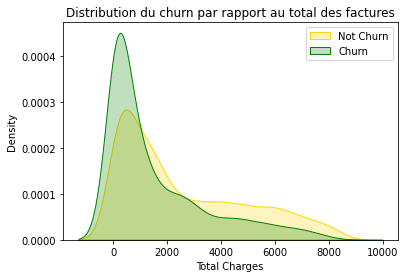

In [29]:
# Distribution du churn par rapport au total des facture

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution du churn par rapport au total des factures');

# On voit que le churn est plus important lorsque le total des factures payés est inférieur à 2000. Il diminue à mesure que le total des factures augmente.
# Il faut être attentif à tous les clients dont le total facturé est inférieur à 2000. Car ceux-ci sont les plus susceptibles de se désabonner.

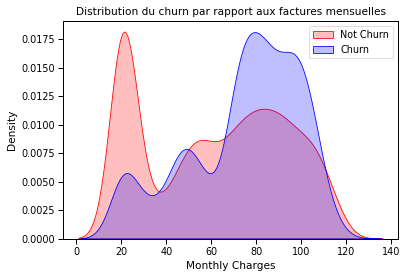

In [30]:
# Distribution du churn par rapport aux factures mensuelles:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution du churn par rapport aux factures mensuelles');

# les clients avec les factures mensuelles les plus élevées, sont les plus nombreux à se désabonner.

In [31]:
# Représentation tenure vs churn
fig = px.box(df, x='Churn', y = 'tenure')
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
fig.update_xaxes(title_text='Churn', row=1, col=1)
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Représentation tenure vs churn</b>',
)
fig.show()

# Les nouveau clients se désabonnent le plus avec une durée médiane d'abonnement de 10 mois.

#### Analyse de la correlation entre variables explicatives

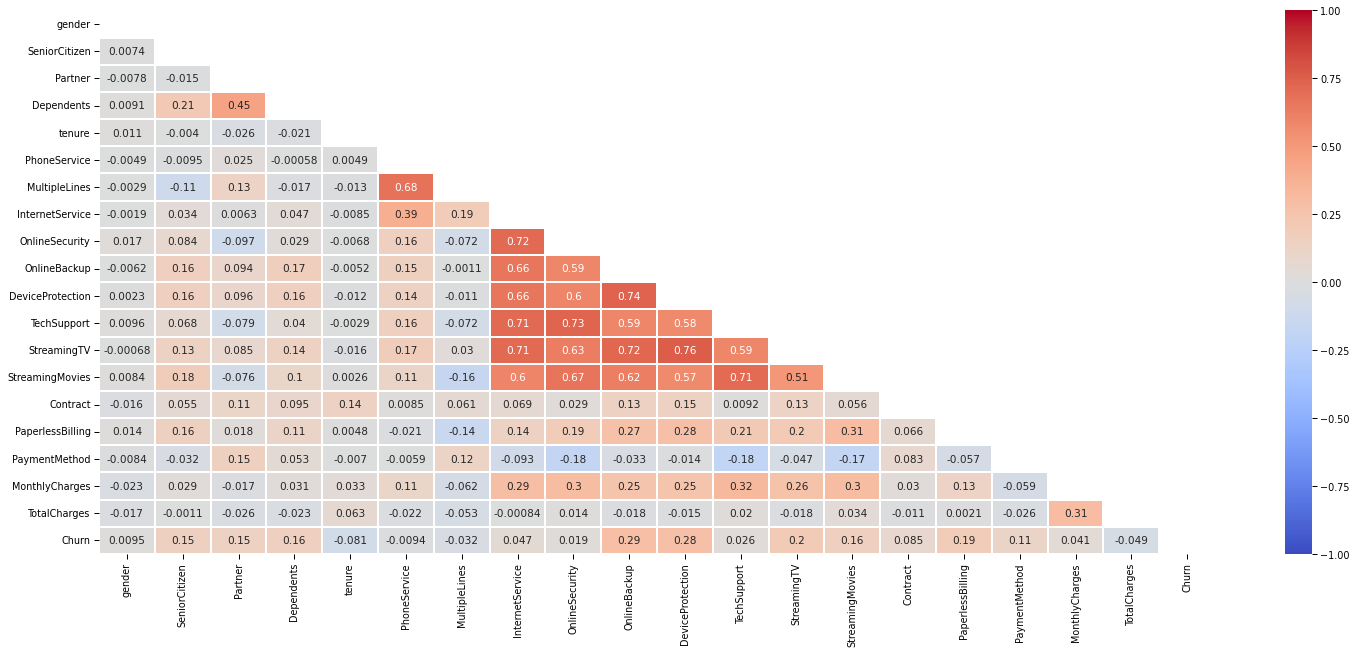

In [32]:
# Graph 6: Analyse des variables ayant une correlation positive forte
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, 
                 yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## Etape 4: Préparation des données pour la construction des modèles

In [41]:
# Avons deux possibilités : 
# Soit faire une LabelEncoder pour numériser les modalités des variables catégorielle.
# ou utiliser la méthode pandas pd.get_dummies
# Nous utiliserons la méthode pandas get_dummies par ce qu'il n'y a pas de notion d'ordre dans le dataframe d'origine

In [33]:
# Identification des colonnes catégorielles
cat_cols = df.select_dtypes(include='O').columns
for col in cat_cols:
    print(f"Nombre de valeurs uniques dans {col}: ", df[col].nunique())

Nombre de valeurs uniques dans gender:  2
Nombre de valeurs uniques dans Partner:  2
Nombre de valeurs uniques dans Dependents:  2
Nombre de valeurs uniques dans PhoneService:  2
Nombre de valeurs uniques dans MultipleLines:  3
Nombre de valeurs uniques dans InternetService:  3
Nombre de valeurs uniques dans OnlineSecurity:  3
Nombre de valeurs uniques dans OnlineBackup:  3
Nombre de valeurs uniques dans DeviceProtection:  3
Nombre de valeurs uniques dans TechSupport:  3
Nombre de valeurs uniques dans StreamingTV:  3
Nombre de valeurs uniques dans StreamingMovies:  3
Nombre de valeurs uniques dans Contract:  3
Nombre de valeurs uniques dans PaperlessBilling:  2
Nombre de valeurs uniques dans PaymentMethod:  4
Nombre de valeurs uniques dans Churn:  2


##### Uniformisation par get_dummies

In [34]:
# Getdummies
df['Churn'].replace(to_replace="Yes", value=1, inplace=True)
df['Churn'].replace(to_replace="No",  value=0, inplace=True)
df_dummies=pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,24.10,1734.65,0,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,0,44,88.15,3973.20,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
2,1,38,74.95,2869.85,1,1,0,0,1,1,...,0,1,0,0,0,1,1,0,0,0
3,0,4,55.90,238.50,0,0,1,1,0,1,...,1,1,0,0,0,1,0,0,1,0
4,0,2,53.45,119.50,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0


##### Construction du jeu d'entrainement et de test

In [35]:
#Churn dataset study case
y = df_dummies['Churn'].values
X = df_dummies.drop('Churn',axis=1)

In [36]:
# Vérification de la répartition des volumes entre les classes des variables cibles
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 4399, 1: 1587}

In [46]:
# Au regard de la répartition des effectifs entre les classes de la variable cible, on peut conclure qu'il y a déséquilibre 
# entre les classe churn oui et churn à non.
# Il y a à 1/3 d'individues qui churn.
# Il faut équilibrer les échantillons de tests et d'entrainement pour éviter des incohérences au niveau des métriques des modèles. 

In [37]:
# Variables explicatives et cible de test et d'entrainement
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, stratify=y, random_state = 0)
print("\nX_train",X_train.shape,
      "\nX_test",X_test.shape,
      "\ny_train",y_train.shape,
      "\ny_test",y_test.shape)


X_train (4190, 45) 
X_test (1796, 45) 
y_train (4190,) 
y_test (1796,)


In [38]:
# Comptage des valeurs des modalités de y_train
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 3079, 1: 1111}

In [39]:
# Comptage des valeurs des modalités de y_test
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 1320, 1: 476}

## Etape 5 : Modélisation et choix meilleur du modèle

#### a- Modélosation classique

##### Ici, on exécute un certain nombre de modèle sur les jeux d'entrainement et de test

#### a-1 Random forest

In [40]:
# instanciation du modèle random forest avec des paramètres
modele_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)

# Entrainement du modèle sur le jeu d'entrainement
modele_rf.fit(X_train, y_train)

# Prédiction sur les variables explicatives du jeu de test
y_pred_test_rf = modele_rf.predict(X_test)

# Vérification de la prédiction de l'output à partir des données source
print("\nY_pred_test", y_pred_test_rf[:10],"\n")

# Calcul de l'accuracy entre la variable cible réelle et et la variable cible prédite
print("accurecy_rf =", metrics.accuracy_score(y_test, y_pred_test_rf))


Y_pred_test [0 0 0 0 0 0 0 0 0 0] 

accurecy_rf = 0.8062360801781737


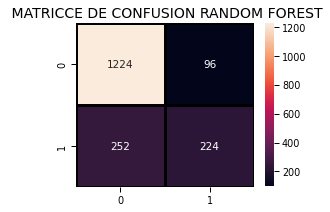

In [41]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rf),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" MATRICCE DE CONFUSION RANDOM FOREST",fontsize=14)
plt.show()

In [42]:
# Rapport de classification 
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1320
           1       0.70      0.47      0.56       476

    accuracy                           0.81      1796
   macro avg       0.76      0.70      0.72      1796
weighted avg       0.80      0.81      0.79      1796



#### a2 - Regression logistique

In [43]:
# Instanciation du modèle
modele_rl = LogisticRegression()
# Entrainement du modèle
modele_rl.fit(X_train,y_train)
#prédiction de la variable explicative
y_pred_test_rl = modele_rl.predict(X_test)
# calcul de la metrique accuracy
print("accurecy_reglog =", metrics.accuracy_score(y_test, y_pred_test_rl))

accurecy_reglog = 0.8129175946547884


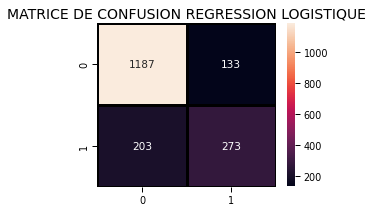

In [44]:
# Matrice de confusion
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rl),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("MATRICE DE CONFUSION REGRESSION LOGISTIQUE",fontsize=14)
plt.show()

In [45]:
# Rapport de classification 
print(classification_report(y_test, y_pred_test_rl))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1320
           1       0.67      0.57      0.62       476

    accuracy                           0.81      1796
   macro avg       0.76      0.74      0.75      1796
weighted avg       0.81      0.81      0.81      1796



#### a3 - KNN

In [46]:
knn_model = KNeighborsClassifier(n_neighbors = 5) 
knn_model.fit(X_train,y_train)
y_pred_test_knn = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("Accuracy KNN:",accuracy_knn)

Accuracy KNN: 0.7522271714922049


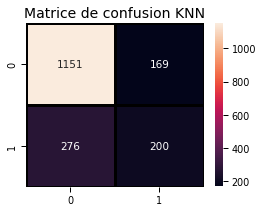

In [47]:
# Matrice de confusion KNN
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_knn),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Matrice de confusion KNN",fontsize=14)
plt.show()

In [48]:
# Rapport de classification KNN
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1320
           1       0.54      0.42      0.47       476

    accuracy                           0.75      1796
   macro avg       0.67      0.65      0.66      1796
weighted avg       0.74      0.75      0.74      1796



#### a4- SVM

In [49]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
y_pred_test_svm = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("Accuracy SVM :",accuracy_svc)

Accuracy SVM : 0.734966592427617


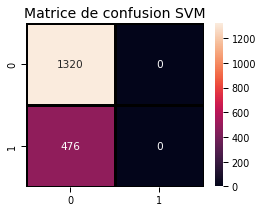

In [50]:
# Matrice de confusion SVM
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_svm),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Matrice de confusion SVM",fontsize=14)
plt.show()

In [51]:
print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1320
           1       0.00      0.00      0.00       476

    accuracy                           0.73      1796
   macro avg       0.37      0.50      0.42      1796
weighted avg       0.54      0.73      0.62      1796



#### a5- Decision Tree Classifier

In [52]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred_test_dt = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Accuracy Tree Classifier :",accuracy_dt)

Accuracy Tree Classifier : 0.7410913140311804


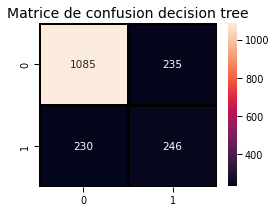

In [53]:
# Matrice de confusion decision tree
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_dt),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Matrice de confusion decision tree",fontsize=14)
plt.show()

In [54]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1320
           1       0.51      0.52      0.51       476

    accuracy                           0.74      1796
   macro avg       0.67      0.67      0.67      1796
weighted avg       0.74      0.74      0.74      1796



#### a6- AdaBoost Classifier

In [55]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
y_pred_test_adc = a_model.predict(X_test)
print("Accuracy AdaBoost Classifier", metrics.accuracy_score(y_test, y_pred_test_adc))

Accuracy AdaBoost Classifier 0.8023385300668151


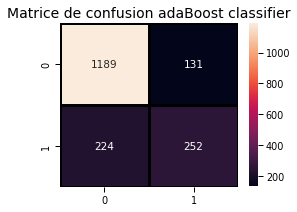

In [56]:
# Matrice de confusion adaBoost classifier
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_adc),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Matrice de confusion adaBoost classifier",fontsize=14)
plt.show()

In [57]:
# Rapport de classification
print(classification_report(y_test, y_pred_test_adc))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1320
           1       0.66      0.53      0.59       476

    accuracy                           0.80      1796
   macro avg       0.75      0.72      0.73      1796
weighted avg       0.79      0.80      0.80      1796



#### a7- Gradient Boosting Classifier

In [58]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_test_gbc = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, y_pred_test_gbc))

Gradient Boosting Classifier 0.7984409799554566


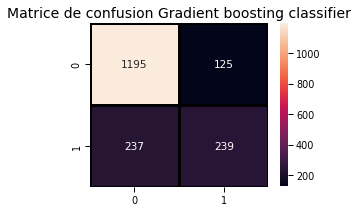

In [59]:
# Matrice de confusion Gradient boosting classifier
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_gbc),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Matrice de confusion Gradient boosting classifier",fontsize=14)
plt.show()

In [60]:
# Rapport de classification Gradient Boosting classifier
print(classification_report(y_test, y_pred_test_gbc))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1320
           1       0.66      0.50      0.57       476

    accuracy                           0.80      1796
   macro avg       0.75      0.70      0.72      1796
weighted avg       0.79      0.80      0.79      1796



**Conclusion partielle**:
# On observe que les modèles ont tous une performance assez élevé pour l'accuracy.  la précision, le recall et le f1-score sont eux aussi élevé pour la modalité 0 de la variable cible. Par contre, pour le prédiction du churn à  # 1, les modèles testé ont tous de performance médiocres. 
# Ceci est sans doute dû au déséquilibre entre les effectifs des deux modalités de la variable cible dans le jeux d'entrainement. Soit environ 1/3 de modalité avec churn à 0 et 2/3 avec churn à 1. 

# Pour palier à ce problème il faut tester rééchantiolloner le jeux d'entraiment par les stratégies: sous-échantillonnage te suréchantillonnage.

### b- Modélisation avec undersampling

#### Undersampling

In [61]:
# sous-échantillonnage aléatoire 
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [62]:
# Affichage des occurences de chaque modalité des variables cibles
from collections import Counter
print(Counter(y_rus))

Counter({0: 1111, 1: 1111})


#### b1- Random forest

In [63]:
# instanciation du modèle random forest avec des paramètres
modele_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)

# Entrainement du modèle sur le jeu d'entrainement
modele_rf.fit(X_rus, y_rus)

# Prédiction sur les variables explicatives du jeu de test
y_pred_test_rf = modele_rf.predict(X_test)

# Vérification de la prédiction de l'output à partir des données source
print("\nY_pred_test", y_pred_test_rf[:10],"\n")

# Calcul de l'accuracy entre la variable cible réelle et et la variable cible prédite
print("accurecy_rf =", metrics.accuracy_score(y_test, y_pred_test_rf))


Y_pred_test [0 0 0 0 0 0 0 0 0 1] 

accurecy_rf = 0.7427616926503341


In [64]:
# Matrice de confusion
vn, fp, fn, vp = confusion_matrix(y_test, y_pred_test_rf).ravel()
print("\n Vrais négatifs:",vn,"\n Faux positifs:",fp,"\n Faux négatifs:",fn,"\n Vrais positifs:",vp)


 Vrais négatifs: 943 
 Faux positifs: 377 
 Faux négatifs: 85 
 Vrais positifs: 391


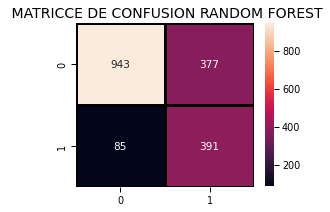

In [65]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rf),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" MATRICCE DE CONFUSION RANDOM FOREST",fontsize=14)
plt.show()

In [66]:
# Rapport de classification 
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1320
           1       0.51      0.82      0.63       476

    accuracy                           0.74      1796
   macro avg       0.71      0.77      0.72      1796
weighted avg       0.81      0.74      0.76      1796



#### b2- Regression logistique

In [67]:
# Instanciation du modèle
modele_rl = LogisticRegression()
# Entrainement du modèle
modele_rl.fit(X_rus,y_rus)
#prédiction de la variable explicative
y_pred_test_rl = modele_rl.predict(X_test)
# calcul de la metrique accuracy
print("accurecy_reglog =", metrics.accuracy_score(y_test, y_pred_test_rl))

accurecy_reglog = 0.7422048997772829


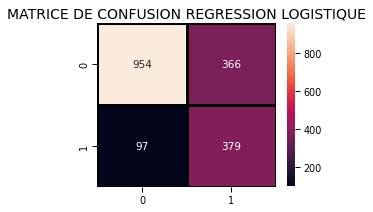

In [68]:
# Matrice de confusion
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rl),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("MATRICE DE CONFUSION REGRESSION LOGISTIQUE",fontsize=14)
plt.show()

In [69]:
# Rapport de classification 
print(classification_report(y_test, y_pred_test_rl))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1320
           1       0.51      0.80      0.62       476

    accuracy                           0.74      1796
   macro avg       0.71      0.76      0.71      1796
weighted avg       0.80      0.74      0.76      1796



#### b3- KNN

In [70]:
knn_model = KNeighborsClassifier(n_neighbors = 5) 
knn_model.fit(X_rus,y_rus)
y_pred_test_knn = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("Accuracy KNN:",accuracy_knn)

Accuracy KNN: 0.6870824053452116


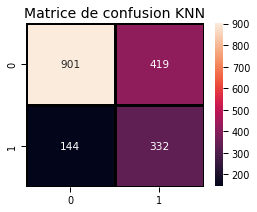

In [82]:
# Matrice de confusion KNN
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_knn),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Matrice de confusion KNN",fontsize=14)
plt.show()

In [71]:
# Rapport de classification KNN
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      1320
           1       0.44      0.69      0.54       476

    accuracy                           0.69      1796
   macro avg       0.65      0.69      0.65      1796
weighted avg       0.75      0.69      0.70      1796



#### b4- SMV

In [72]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_rus,y_rus)
y_pred_test_svm = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("Accuracy SVM :",accuracy_svc)

Accuracy SVM : 0.6525612472160356


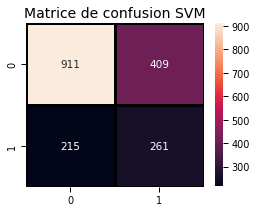

In [73]:
# Matrice de confusion SVM
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_svm),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Matrice de confusion SVM",fontsize=14)
plt.show()

In [74]:
print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.81      0.69      0.74      1320
           1       0.39      0.55      0.46       476

    accuracy                           0.65      1796
   macro avg       0.60      0.62      0.60      1796
weighted avg       0.70      0.65      0.67      1796



#### b5- Decision Tree Classifier

In [75]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_rus,y_rus)
y_pred_test_dt = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Accuracy Tree Classifier :",accuracy_dt)

Accuracy Tree Classifier : 0.6687082405345212


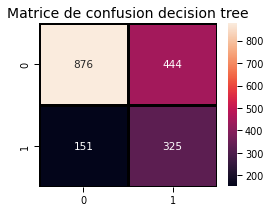

In [76]:
# Matrice de confusion decision tree
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_dt),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Matrice de confusion decision tree",fontsize=14)
plt.show()

In [77]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.85      0.66      0.75      1320
           1       0.42      0.68      0.52       476

    accuracy                           0.67      1796
   macro avg       0.64      0.67      0.63      1796
weighted avg       0.74      0.67      0.69      1796



#### b6- AdaBoost Classifier

In [78]:
a_model = AdaBoostClassifier()
a_model.fit(X_rus,y_rus)
y_pred_test_adc = a_model.predict(X_test)
print("Accuracy AdaBoost Classifier", metrics.accuracy_score(y_test, y_pred_test_adc))

Accuracy AdaBoost Classifier 0.7338530066815144


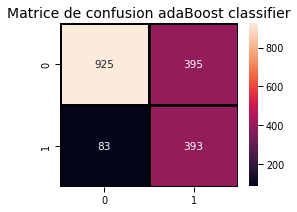

In [79]:
# Matrice de confusion adaBoost classifier
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_adc),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Matrice de confusion adaBoost classifier",fontsize=14)
plt.show()

In [80]:
# Rapport de classification
print(classification_report(y_test, y_pred_test_adc))

              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1320
           1       0.50      0.83      0.62       476

    accuracy                           0.73      1796
   macro avg       0.71      0.76      0.71      1796
weighted avg       0.81      0.73      0.75      1796



#### b7- Gradient Boosting Classifier

In [81]:
gb = GradientBoostingClassifier()
gb.fit(X_rus, y_rus)
y_pred_test_gbc = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, y_pred_test_gbc))

Gradient Boosting Classifier 0.732739420935412


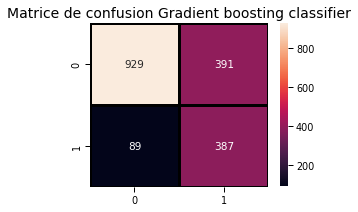

In [82]:
# Matrice de confusion Gradient boosting classifier
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_gbc),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Matrice de confusion Gradient boosting classifier",fontsize=14)
plt.show()

In [83]:
# Rapport de classification Gradient Boosting classifier
print(classification_report(y_test, y_pred_test_gbc))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1320
           1       0.50      0.81      0.62       476

    accuracy                           0.73      1796
   macro avg       0.71      0.76      0.71      1796
weighted avg       0.80      0.73      0.75      1796



In [96]:
# Les modèles de regression logistique et de AdBoost classifier sont les plus performant dans le cadre de l'undersampling
# au regard des métrique de accuracy, recall et score F1

### c-  Modélisation avec OverSampling

#### Oversampling

In [84]:
# suréchantillonnage aléatoire
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy='auto')
X_rov, y_rov = over.fit_resample(X_train, y_train)
print(Counter(y_rov))

Counter({1: 3079, 0: 3079})


#### c1- Random forest

In [85]:
# instanciation du modèle random forest avec des paramètres
modele_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)

# Entrainement du modèle sur le jeu d'entrainement
modele_rf.fit(X_rov, y_rov)

# Prédiction sur les variables explicatives du jeu de test
y_pred_test_rf = modele_rf.predict(X_test)

# Vérification de la prédiction de l'output à partir des données source
print("\nY_pred_test", y_pred_test_rf[:10],"\n")

# Calcul de l'accuracy entre la variable cible réelle et et la variable cible prédite
print("accurecy_rf =", metrics.accuracy_score(y_test, y_pred_test_rf))


Y_pred_test [0 0 0 0 0 0 0 0 0 1] 

accurecy_rf = 0.7466592427616926


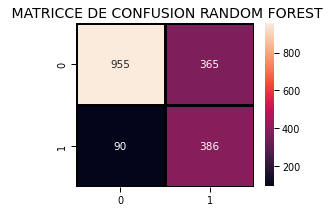

In [86]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rf),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" MATRICCE DE CONFUSION RANDOM FOREST",fontsize=14)
plt.show()

In [87]:
# Rapport de classification 
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1320
           1       0.51      0.81      0.63       476

    accuracy                           0.75      1796
   macro avg       0.71      0.77      0.72      1796
weighted avg       0.81      0.75      0.76      1796



#### c2- Regression logistique

In [88]:
# Instanciation du modèle
modele_rl = LogisticRegression()
# Entrainement du modèle
modele_rl.fit(X_rov,y_rov)
#prédiction de la variable explicative
y_pred_test_rl = modele_rl.predict(X_test)
# calcul de la metrique accuracy
print("accurecy_reglog =", metrics.accuracy_score(y_test, y_pred_test_rl))

accurecy_reglog = 0.7461024498886414


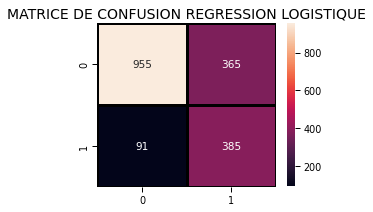

In [89]:
# Matrice de confusion
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rl),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("MATRICE DE CONFUSION REGRESSION LOGISTIQUE",fontsize=14)
plt.show()

In [90]:
# Rapport de classification 
print(classification_report(y_test, y_pred_test_rl))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1320
           1       0.51      0.81      0.63       476

    accuracy                           0.75      1796
   macro avg       0.71      0.77      0.72      1796
weighted avg       0.81      0.75      0.76      1796



#### c3- KNN

In [91]:
knn_model = KNeighborsClassifier(n_neighbors = 7) 
knn_model.fit(X_rov,y_rov)
y_pred_test_knn = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("Accuracy KNN:",accuracy_knn)

Accuracy KNN: 0.6681514476614699


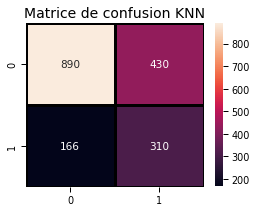

In [92]:
# Matrice de confusion KNN
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_knn),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Matrice de confusion KNN",fontsize=14)
plt.show()

In [93]:
# Rapport de classification KNN
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.84      0.67      0.75      1320
           1       0.42      0.65      0.51       476

    accuracy                           0.67      1796
   macro avg       0.63      0.66      0.63      1796
weighted avg       0.73      0.67      0.69      1796



#### c4- SVM

In [94]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_rov,y_rov)
y_pred_test_svm = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("Accuracy SVM :",accuracy_svc)

Accuracy SVM : 0.6815144766146993


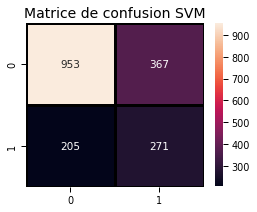

In [95]:
# Matrice de confusion SVM
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_svm),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Matrice de confusion SVM",fontsize=14)
plt.show()

In [96]:
print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1320
           1       0.42      0.57      0.49       476

    accuracy                           0.68      1796
   macro avg       0.62      0.65      0.63      1796
weighted avg       0.72      0.68      0.69      1796



#### c5- Decision tree classifier

In [97]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_rov,y_rov)
y_pred_test_dt = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Accuracy Tree Classifier :",accuracy_dt)

Accuracy Tree Classifier : 0.7243875278396437


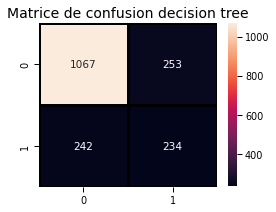

In [98]:
# Matrice de confusion decision tree
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_dt),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Matrice de confusion decision tree",fontsize=14)
plt.show()

In [99]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1320
           1       0.48      0.49      0.49       476

    accuracy                           0.72      1796
   macro avg       0.65      0.65      0.65      1796
weighted avg       0.73      0.72      0.73      1796



#### c6- AdBoost Classifier


In [100]:
a_model = AdaBoostClassifier()
a_model.fit(X_rov,y_rov)
y_pred_test_adc = a_model.predict(X_test)
print("Accuracy AdaBoost Classifier", metrics.accuracy_score(y_test, y_pred_test_adc))

Accuracy AdaBoost Classifier 0.7388641425389755


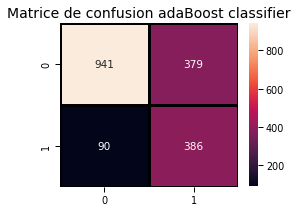

In [101]:
# Matrice de confusion adaBoost classifier
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_adc),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Matrice de confusion adaBoost classifier",fontsize=14)
plt.show()

In [102]:
# Rapport de classification
print(classification_report(y_test, y_pred_test_adc))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1320
           1       0.50      0.81      0.62       476

    accuracy                           0.74      1796
   macro avg       0.71      0.76      0.71      1796
weighted avg       0.80      0.74      0.75      1796



#### c7- Gradient Boosting Classifier

In [103]:
gb = GradientBoostingClassifier()
gb.fit(X_rov, y_rov)
y_pred_test_gbc = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, y_pred_test_gbc))

Gradient Boosting Classifier 0.7572383073496659


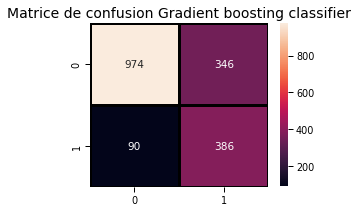

In [104]:
# Matrice de confusion Gradient boosting classifier
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test_gbc),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Matrice de confusion Gradient boosting classifier",fontsize=14)
plt.show()

In [105]:
# Rapport de classification Gradient Boosting classifier
print(classification_report(y_test, y_pred_test_gbc))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1320
           1       0.53      0.81      0.64       476

    accuracy                           0.76      1796
   macro avg       0.72      0.77      0.73      1796
weighted avg       0.81      0.76      0.77      1796



## Etape 6 - Comparaison des modèles

#### 1- Comparaison des modèles classiques

RFC: 0.782100 (0.016640)
LDA: 0.790692 (0.021428)
LR: 0.794511 (0.019780)
KNN: 0.775656 (0.017408)
NB: 0.688067 (0.028660)
SVM: 0.734845 (0.023517)
CART: 0.726492 (0.015694)
ADBC: 0.799045 (0.023257)
GB: 0.792840 (0.022409)


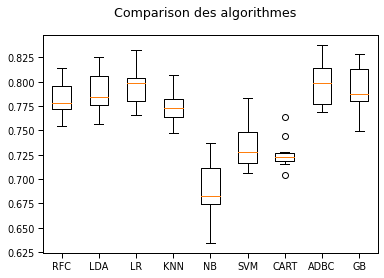

In [106]:
models = []
models.append((('RFC'),RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ADBC',AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train.values, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# Compariason des algorithmes par le boxplot
fig = plt.figure()
fig.suptitle('Comparison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### 2- Comparaison avec sous échantillonage de la variable cible

RFC: 0.708827 (0.031774)
LDA: 0.713348 (0.046194)
LR: 0.719620 (0.033604)
KNN: 0.659742 (0.020914)
NB: 0.728273 (0.117775)
SVM: 0.454577 (0.059317)
CART: 0.645790 (0.030736)
ADBC: 0.723262 (0.048213)
GB: 0.723688 (0.039673)


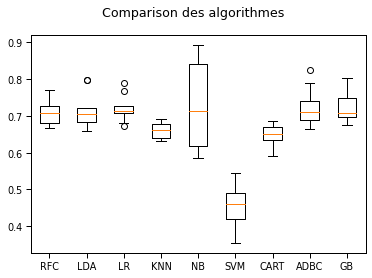

In [107]:
models = []
models.append((('RFC'),RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ADBC',AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_rus.values, y_rus, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# Compariason des algorithmes par le boxplot
fig = plt.figure()
fig.suptitle('Comparison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### 3- Comparaison avec suréchantillonage de la variable cible

RFC: 0.900000 (0.067107)
LDA: 0.736454 (0.030225)
LR: 0.743435 (0.028355)
KNN: 0.750596 (0.055442)
NB: 0.747014 (0.037781)
SVM: 0.604216 (0.079356)
CART: 0.870779 (0.085075)
ADBC: 0.754967 (0.027200)
GB: 0.769579 (0.027126)


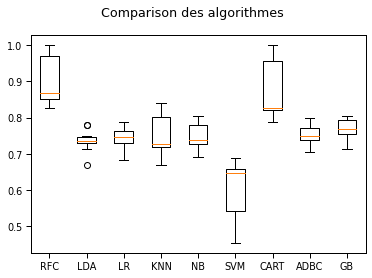

In [124]:
models = []
models.append((('RFC'),RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ADBC',AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_rov.values, y_rov, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# Compariason des algorithmes par le boxplot
fig = plt.figure()
fig.suptitle('Comparison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Conclusion: 
#### L'oversampling confirme le choix des deux modèle Regression Logistique et AdaboostClassifier.
#### Néanmoins l'undersampling semble fournir de meilleurs résultats lors de l'entrainement des modèles. Nous choisirons donc cette stratégie pour les prédictions finales.